In [172]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [173]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [174]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape dataset
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize dataset
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

import tensorflow as tf

# Convert the data to a TensorFlow data Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Shuffle the data
# The argument of shuffle represents the number of data points 
# in the dataset we would like to shuffle at a time.
train_dataset = train_dataset.shuffle(60000)

# Set up batch size
BATCH_SIZE = batch_size

# Batch the data
train_dataset = train_dataset.batch(BATCH_SIZE)

In [175]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # First convolution layer
        self.conv1 = Conv2D(32, (3, 3), input_shape=(28, 28, 1))
        self.act1 = Activation('relu')
        self.pool1 = MaxPooling2D(pool_size=(2, 2))

        # Second convolution layer
        self.conv2 = Conv2D(64, (3, 3))
        self.act2 = Activation('relu')
        self.pool2 = MaxPooling2D(pool_size=(2, 2))

        # Fully connected layer
        self.flatten = Flatten()
        self.fc = Dense(64)
        self.act3 = Activation('relu')

        # Output layer
        self.output_layer = Dense(10, activation='softmax')

    def call(self, x):
        x = self.pool1(self.act1(self.conv1(x)))
        x = self.pool2(self.act2(self.conv2(x)))
        x = self.act3(self.fc(self.flatten(x)))
        return self.output_layer(x)

In [176]:
import tensorflow as tf

# Instantiate the model
model = NeuralNetwork()

# Define the loss and accuracy metrics
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.CategoricalAccuracy()

# Define the optimizer
optimizer = tf.keras.optimizers.legacy.Adam()

# Define a training step
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Update the metrics
    accuracy.update_state(labels, predictions)
    return loss

# Training loop
loss_history = []
accuracy_history = []

# Number of steps to display and save metrics
# display_step = 10

for epoch in range(10):  # Number of epochs

    # Take the data from the training dataset
    train_data = train_dataset.shuffle(60000).take(display_step)
    for step, (images, labels) in enumerate(train_data):

        # Training step
        loss_value = train_step(images, labels)

        # Display and save the metrics every display_step
        if step % display_step == 0:
            loss_history.append(loss_value.numpy())
            accuracy_history.append(accuracy.result().numpy())
            print(f"Epoch: {epoch}, Step: {step}, Loss: {loss_value}, Accuracy: {accuracy.result()}")

2023-12-17 10:15:03.773998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-12-17 10:15:03.774173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


Epoch: 0, Step: 0, Loss: 2.294002056121826, Accuracy: 0.0625


2023-12-17 10:15:06.875595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-12-17 10:15:06.875747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


Epoch: 1, Step: 0, Loss: 0.175063818693161, Accuracy: 0.8454517126083374


2023-12-17 10:15:09.878405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-12-17 10:15:09.878557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 2, Step: 0, Loss: 0.11394651979207993, Accuracy: 0.9028101563453674


2023-12-17 10:15:12.739781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:12.739931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


Epoch: 3, Step: 0, Loss: 0.07154398411512375, Accuracy: 0.9261705875396729


2023-12-17 10:15:15.736613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:15.736772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 4, Step: 0, Loss: 0.03398368880152702, Accuracy: 0.9392171502113342


2023-12-17 10:15:18.710826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2023-12-17 10:15:18.710993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 5, Step: 0, Loss: 0.07893979549407959, Accuracy: 0.947161078453064


2023-12-17 10:15:21.587103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:21.587254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 6, Step: 0, Loss: 0.09567559510469437, Accuracy: 0.9531347751617432


2023-12-17 10:15:24.479007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:24.479159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


Epoch: 7, Step: 0, Loss: 0.06361708045005798, Accuracy: 0.9577386975288391


2023-12-17 10:15:27.369902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:27.370051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 8, Step: 0, Loss: 0.05404091253876686, Accuracy: 0.9613484144210815


2023-12-17 10:15:30.291262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-12-17 10:15:30.291415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]


Epoch: 9, Step: 0, Loss: 0.0375315397977829, Accuracy: 0.9642850756645203


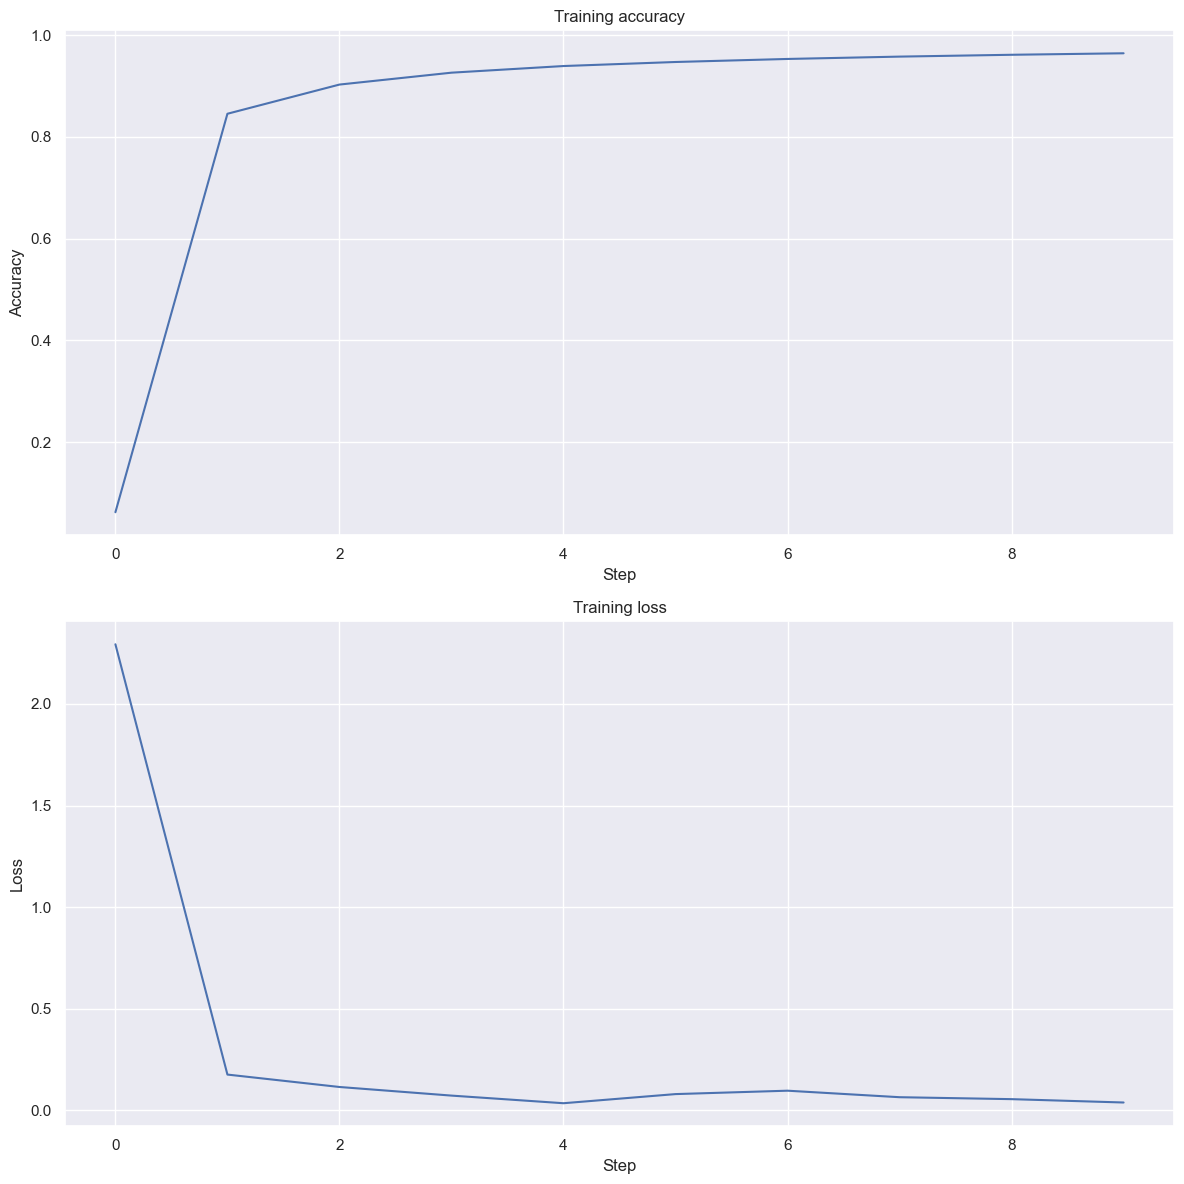

In [177]:
import matplotlib.pyplot as plt

# Create two subplots: one for the accuracy and another for the loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Accuracy plot
ax1.plot(accuracy_history)
ax1.set_xlabel('Step')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training accuracy')

# Loss plot
ax2.plot(loss_history)
ax2.set_xlabel('Step')
ax2.set_ylabel('Loss')
ax2.set_title('Training loss')

plt.tight_layout()
plt.show()

In [178]:
# Make predictions
predictions = model.predict(X_test)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# compute the accuracy
accuracy = np.mean(predicted_classes == true_classes)

print(f"Test accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step
Test accuracy: 98.83%


1/1 [==============================] - 0s 8ms/step


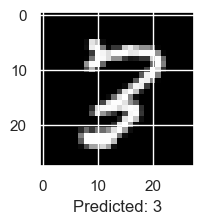

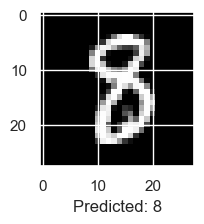

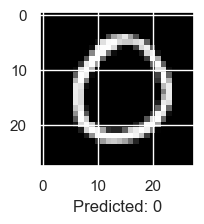

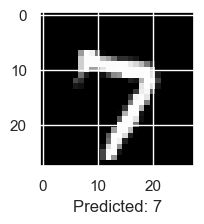

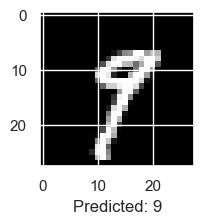

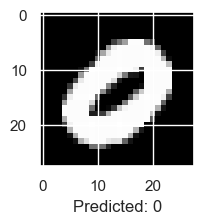

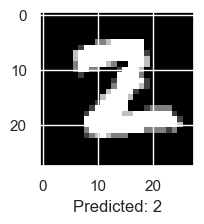

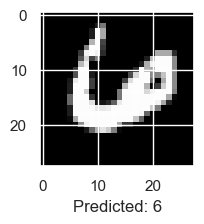

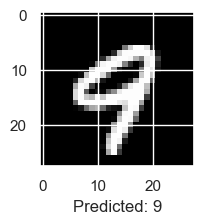

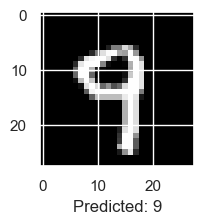

Точність на цих 10 зображеннях: 98.83%

На основі результатів на тренувальних данних модель справилась непогано, так як точність за 3000 епох = 0.99, що є непоганим показником для моделі tensorflow 1.0. З тестовими данними модель справилась бездоганно так як було відгадано 98.83% тестових зображень


In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Choose 10 random images from the test dataset
num_images = 10
random_test_images = X_test[np.random.randint(X_test.shape[0], size=num_images)]

# Make predictions
predictions = model.predict(random_test_images)

# Plot each image with its predicted label
for i in range(num_images):
    plt.figure(figsize=(2, 2))
    plt.imshow(random_test_images[i], cmap='gray')
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}")
    plt.show()

print(f"Точність на цих 10 зображеннях: {accuracy * 100:.2f}%")
print(f'\nНа основі результатів на тренувальних данних модель справилась непогано, так як точність за 3000 епох = {accuracy:.2f}, що є непоганим показником для моделі tensorflow 1.0. З тестовими данними модель справилась бездоганно так як було відгадано {accuracy * 100:.2f}% тестових зображень')

На основі результатів тренування та тестування можна робити висновки про якість навченої мережі, її ефективність у вирішенні завдання розпізнавання рукописних цифр та можливі шляхи подальшого вдосконалення.